In [9]:
import os
import math
import warnings
import datetime
import pandas as pd
import numpy as np
import lightgbm as lgb
import tqdm

# warnings.filterwarnings("ignore")

In [2]:
data_dir_path = "/home/kenny/data/ethusdt"
model_file_path = "/home/kenny/TradingExperiments/reports/experiments_results/ETHUSDT/exp_1/lgb_model.txt"
snapshot_path = "/home/kenny/data/ethusdt/ETHUSDT_2023_05_27.csv"

In [91]:
'.'.join(snapshot_path.split('/')[-1][:-4].split('_')[:0:-1])

'27.05.2023'

In [3]:
for snapshot_data in os.listdir(data_path):
    print(snapshot_data)

ETHUSDT_snapshot_md_2023_05_25.csv
ETHUSDT_snapshot_md_2023_05_27.csv
ETHUSDT_snapshot_md_2023_05_26.csv


In [6]:
model = lgb.Booster(model_file=model_file_path)

<Figure size 6000x12000 with 0 Axes>

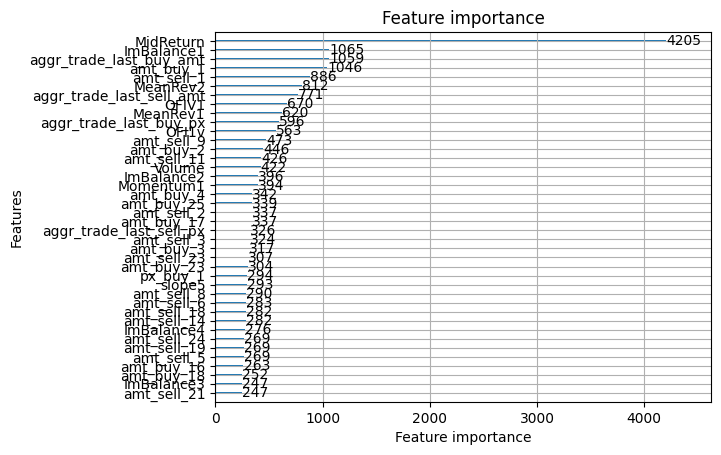

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 120))
lgb.plot_importance(model, max_num_features=40)
plt.show()

In [3]:
chunk_size = 1000000
csv_reader = pd.read_csv(snapshot_path, chunksize=chunk_size, sep="|", iterator=True)

for part_number, chunk in enumerate(csv_reader):
    if part_number == 0:
        chunk = chunk.iloc[10:]
    break

In [4]:
chunk

,px_buy_1,amt_buy_1,px_buy_2,amt_buy_2,px_buy_3,amt_buy_3,px_buy_4,amt_buy_4,px_buy_5,amt_buy_5,...,amt_sell_25,aggr_trade_last_buy_px,aggr_trade_last_buy_amt,aggr_trade_last_buy_cnt,aggr_trade_last_sell_px,aggr_trade_last_sell_amt,aggr_trade_last_sell_cnt,adapter_time,host_time,sent_time
10,1826.75,1.435,1826.74,0.301,1826.73,0.01,1826.72,0.013,1826.71,0.01,...,22.296,1826.76,0.010,1,1826.75,1.500,1,1685146206712461990,1685146200530000000,1685146200685000000
11,1826.75,1.435,1826.74,0.301,1826.73,0.01,1826.72,0.013,1826.71,0.01,...,22.296,1826.76,0.216,1,1826.75,1.500,1,1685146206714728115,1685146201280000000,1685146201435000000
12,1826.75,1.435,1826.74,0.301,1826.73,0.01,1826.72,0.013,1826.71,0.01,...,22.296,1826.76,0.216,1,1826.75,0.158,1,1685146206718031416,1685146202083000000,1685146202169000000
13,1826.75,1.435,1826.74,0.301,1826.73,0.01,1826.72,0.013,1826.71,0.01,...,22.296,1826.76,1.299,1,1826.75,0.158,1,1685146206718124448,1685146202165000000,1685146202191000000
14,1826.75,1.435,1826.74,0.301,1826.73,0.01,1826.72,0.013,1826.71,0.01,...,22.296,1826.76,1.299,1,1826.75,0.157,1,1685146206718290099,1685146202186000000,1685146202207000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1828.16,22.262,1828.15,5.010,1828.14,0.01,1828.13,0.013,1828.12,0.01,...,49.637,1828.17,0.082,1,1828.16,10.480,2,1685176936458495359,1685176936312000000,1685176936318000000
999996,1828.16,22.262,1828.15,5.010,1828.14,0.01,1828.13,0.013,1828.12,0.01,...,49.637,1828.17,0.082,1,1828.16,10.480,2,1685176936496635217,1685176936349000000,1685176936356000000
999997,1828.16,22.262,1828.15,5.010,1828.14,0.01,1828.13,0.013,1828.12,0.01,...,49.637,1828.17,0.082,1,1828.16,10.480,2,1685176936567709758,1685176936415000000,1685176936427000000
999998,1828.16,22.262,1828.15,5.010,1828.14,0.01,1828.13,0.013,1828.12,0.01,...,49.637,1828.17,0.082,1,1828.16,10.480,2,1685176936599605880,1685176936450000000,1685176936459000000


In [5]:
chunk = chunk.assign(MidPrice=chunk[["px_buy_1", "px_sell_1"]].mean(axis=1))

In [6]:
chunk = chunk.assign(MidPricePrev=chunk["MidPrice"].shift(1).fillna(0))

In [ ]:
chunk["MidPrice"] = chunk[["px_buy_1", "px_sell_1"]].mean(axis=1)

In [49]:
chunk[["px_buy_1", "px_sell_1"]].sample(10)

,px_buy_1,px_sell_1
2039884,1820.70,1820.71
2227510,1820.79,1820.80
2050481,1821.97,1821.98
2264121,1823.98,1823.99
2739498,1829.15,1829.16
2113233,1823.33,1823.34
2170547,1826.75,1826.76
2777451,1829.90,1829.91
2131353,1823.75,1823.76
2622646,1827.21,1827.22


In [57]:
len(chunk[chunk["px_sell_1"] > chunk["px_buy_1"] + 0.01])

34984

In [5]:
import sys
sys.path.insert(1, '/home/kenny/TradingExperiments/src')

from clean import read_data, feature_creation

chunk = read_data(chunk)
chunk = feature_creation(chunk)

In [6]:
chunk.sample(10)

,px_buy_1,amt_buy_1,px_buy_2,amt_buy_2,px_buy_3,amt_buy_3,px_buy_4,amt_buy_4,px_buy_5,amt_buy_5,...,TruePrice,LagTruePrice,MeanRev2,MeanRev1,MidReturn,Momentum1,Momentum2,Momentum3,Volume,TrueVolume
adapter_time,,,,,,,,,,,,,,,,,,,,,
2023-05-27 03:10:22.120625479,1831.80,78.872,1831.79,11.718,1831.78,3.251,1831.77,19.927,1831.76,15.659,...,1831.805,0.0,0.000,0.000,0.0,0.0,0.0,0.0,204.560,29.905
2023-05-27 03:36:25.330660273,1832.31,254.085,1832.30,2.029,1832.29,3.471,1832.28,11.174,1832.27,9.303,...,1832.315,0.0,0.049,0.018,0.0,0.0,0.0,0.0,294.293,2.491
2023-05-27 03:00:14.463104697,1832.47,313.973,1832.46,89.733,1832.45,0.013,1832.44,8.998,1832.43,15.212,...,1832.475,0.0,0.000,0.000,0.0,0.0,0.0,0.0,453.906,0.000
2023-05-27 06:00:35.880391669,1830.48,184.928,1830.47,97.220,1830.46,10.425,1830.45,23.070,1830.44,0.013,...,1830.485,0.0,0.000,0.000,0.0,0.0,0.0,0.0,768.696,-4.341
2023-05-27 06:18:20.089332634,1830.41,321.389,1830.40,5.462,1830.39,16.402,1830.38,0.016,1830.37,0.068,...,1830.415,0.0,0.000,0.000,0.0,0.0,0.0,0.0,553.168,-0.262
2023-05-27 04:12:14.434421977,1833.86,21.570,1833.85,0.014,1833.84,0.010,1833.83,0.013,1833.82,4.418,...,1833.865,0.0,0.000,0.000,0.0,0.0,0.0,0.0,309.050,-0.067
2023-05-27 01:08:30.092645104,1826.34,70.351,1826.33,2.255,1826.32,8.086,1826.31,0.564,1826.30,0.016,...,1826.345,0.0,0.000,0.000,0.0,0.0,0.0,0.0,227.136,2.737
2023-05-27 00:27:57.279622003,1825.64,69.591,1825.63,4.833,1825.62,20.010,1825.61,54.950,1825.60,25.351,...,1825.645,0.0,0.000,0.000,0.0,0.0,0.0,0.0,220.665,0.000
2023-05-27 03:03:29.927864548,1832.25,311.058,1832.24,4.404,1832.23,0.014,1832.22,0.010,1832.21,16.096,...,1832.255,0.0,0.000,0.000,0.0,0.0,0.0,0.0,335.874,61.014


In [20]:
import pandas as pd
import datetime

# Create a sample DataFrame with a timestamp index
df = pd.DataFrame({'A': [1, 2, 3, 4, 5]}, index=pd.date_range('2022-01-01', periods=5, freq='s'))
print(df)

# Create a new column with shifted values where index2 >= index1 + 40 milliseconds
condition = (df.index.to_series().diff(-1) <= datetime.timedelta(milliseconds=-40)).fillna(False)
df['B'] = df['A'].shift(-1)
df.loc[~condition, 'B'] = None

print(df)


                     A
2022-01-01 00:00:00  1
2022-01-01 00:00:01  2
2022-01-01 00:00:02  3
2022-01-01 00:00:03  4
2022-01-01 00:00:04  5
                     A    B
2022-01-01 00:00:00  1  2.0
2022-01-01 00:00:01  2  3.0
2022-01-01 00:00:02  3  4.0
2022-01-01 00:00:03  4  5.0
2022-01-01 00:00:04  5  NaN


In [30]:
delta = datetime.timedelta(milliseconds=40)
print(df.index[0])
print(df.index[0] + delta)

2022-01-01 00:00:00
2022-01-01 00:00:00.040000


In [7]:
import datetime

timestamp = chunk.index[0]  # Get the current timestamp
delta = datetime.timedelta(milliseconds=40)  # Create a timedelta representing 40 milliseconds
new_timestamp = timestamp + delta  # Add the timedelta to the timestamp
print(timestamp)
print(new_timestamp)
print(new_timestamp >= timestamp)

2023-05-27 00:10:06.712461990
2023-05-27 00:10:06.752461990
True


In [45]:
chunk["TruePriceShifted"] = chunk["TruePrice"].shift(periods=1, freq=pd.Timedelta('40ms'))
chunk[["TruePrice", "TruePriceShifted"]].sample(20)

,TruePrice,TruePriceShifted
adapter_time,,
2023-05-27 02:44:12.055749858,1831.965,NaN
2023-05-27 06:45:36.267787401,1831.115,NaN
2023-05-27 00:51:28.231077853,1825.015,NaN
2023-05-27 03:47:21.915103442,1833.535,NaN
2023-05-27 08:32:06.602023087,1829.135,NaN
2023-05-27 08:26:48.056692900,1828.365,NaN
2023-05-27 03:06:43.267310720,1832.055,NaN
2023-05-27 05:38:29.363885873,1828.845,NaN
2023-05-27 04:26:09.608489488,1832.195,NaN


In [38]:
chunk[["TruePrice"]]

,TruePrice
adapter_time,
2023-05-27 00:10:06.712461990,1826.755
2023-05-27 00:10:06.714728115,1826.755
2023-05-27 00:10:06.718031416,1826.755
2023-05-27 00:10:06.718124448,1826.755
2023-05-27 00:10:06.718290099,1826.755
...,...
2023-05-27 08:42:16.458495359,1828.165
2023-05-27 08:42:16.496635217,1828.165
2023-05-27 08:42:16.567709758,1828.165


In [16]:
specific_value = new_timestamp
print(specific_value)
# first_position = chunk.index.get_loc(specific_value, method='nearest')
first_position = chunk.index.get_indexer([specific_value], method='nearest')[0]
chunk.iloc[first_position]

2023-05-27 00:10:06.752461990


px_buy_1      1826.740
amt_buy_1        2.478
px_buy_2      1826.730
amt_buy_2        0.010
px_buy_3      1826.720
                ...   
Momentum1        0.000
Momentum2        0.000
Momentum3        0.000
Volume         255.910
TrueVolume       0.098
Name: 2023-05-27 00:10:06.749854716, Length: 137, dtype: float64

In [24]:
specific_value = timestamp
first_position = chunk.index.searchsorted(specific_value)
chunk.iloc[first_position]

1826.75

In [23]:
first_position

0

In [18]:
chunk.iloc[108:111]

,px_buy_1,amt_buy_1,px_buy_2,amt_buy_2,px_buy_3,amt_buy_3,px_buy_4,amt_buy_4,px_buy_5,amt_buy_5,...,TruePrice,LagTruePrice,MeanRev2,MeanRev1,MidReturn,Momentum1,Momentum2,Momentum3,Volume,TrueVolume
adapter_time,,,,,,,,,,,,,,,,,,,,,
2023-05-27 00:10:06.743603746,1826.74,2.478,1826.73,0.01,1826.72,0.013,1826.71,0.01,1826.7,0.01,...,1826.745,0.0,-0.0045,0.0,0.0,0.0,0.0,0.0,255.812,-0.098
2023-05-27 00:10:06.749854716,1826.74,2.478,1826.73,0.01,1826.72,0.013,1826.71,0.01,1826.7,0.01,...,1826.745,0.0,-0.0040,0.0,0.0,0.0,0.0,0.0,255.910,0.098
2023-05-27 00:10:06.785987850,1826.74,2.478,1826.73,0.01,1826.72,0.013,1826.71,0.01,1826.7,0.01,...,1826.745,0.0,-0.0035,0.0,0.0,0.0,0.0,0.0,255.907,-0.003


In [ ]:
import datetime
for index, row in chunk.iterrows():
    if row["TruePrice"]:
        print(True)

In [ ]:
X_train = first_chunk.drop(["LagTruePrice"], axis=1)
y_train = first_chunk["LagTruePrice"]

y_predict = model.predict(X_train)
first_chunk["predicted"] = y_predict
first_chunk[["LagTruePrice", "predicted"]]
df = first_chunk[["px_buy_1", "px_sell_1", "LagTruePrice", "predicted", "TruePrice"]].head(1000)
df['PredictedPrice'] = df["TruePrice"] + df["predicted"].shift(1).fillna(0)
df["PreviousMidPrice"] = df["TruePrice"].shift(1).fillna(0)
df

In [23]:
import sys
sys.path.insert(1, '/home/kenny/TradingExperiments/src')

from clean import read_data, feature_creation

def _helper_with_time_delay(df, vol, fee, time_delay):
    '''
    df - dataframe
    vol - volume for one order
    fee - comission for one order
    time_delay - time delay for order execution
    '''
    long_chances, short_chances = 0,0
    for index, row in df.iterrows():
        timestamp = index
        delta = datetime.timedelta(milliseconds=time_delay)  # Create a timedelta representing 40 milliseconds
        new_timestamp = timestamp + delta  # Add the timedelta to the timestamp
        first_position = df.index.searchsorted(new_timestamp) # Time complexity is log(n) for searching
        if first_position >= len(df):
            continue
        mid_price_entry = row['TruePrice']
        mid_price_out = df.iloc[first_position]['TruePrice']
        if (mid_price_out - mid_price_entry) >= (2*vol*mid_price_entry*fee / 100):
            long_chances += 1
        elif (mid_price_entry - mid_price_out) >= (2*vol*mid_price_entry*fee / 100):
            short_chances += 1
    return long_chances, short_chances


def make_some_analysis(path,vol, fee=0.1, time_delay = 40):
    '''
    path - path to a data file
    vol - volume of an order
    comission in %, default value for binance is 0.1% 
    '''
    chunk_size = 1000000
    csv_reader = pd.read_csv(path, chunksize=chunk_size, sep="|", iterator=True)
    total_chunks = math.ceil(sum(1 for line in open(path)) / chunk_size)
    total_number_of_events = 0
    result = {
        "vol": vol,
        "total": 0,
        "buy_chances": 0,
        "sell_chances": 0,
    }
    for part_number, chunk in tqdm.tqdm(enumerate(csv_reader), total=total_chunks):
        if part_number == 0:
            chunk = chunk.iloc[10:]
        elif part_number == total_chunks - 1:
            chunk = chunk.iloc[:-10]
        chunk = read_data(chunk)
        chunk = feature_creation(chunk)
        buy_chances, sell_chances = _helper_with_time_delay(chunk, vol, fee, time_delay)
        total_number_of_events += len(chunk)
        result["buy_chances"] += buy_chances
        result["sell_chances"] += sell_chances
    result["total"] = total_number_of_events
    return result

In [24]:
res = make_some_analysis(snapshot_path, vol=0.01)

100%|██████████| 3/3 [07:09<00:00, 143.19s/it]


In [25]:
res

{'vol': 0.01, 'total': 2809560, 'buy_chances': 61103, 'sell_chances': 60641}

In [121]:
my_list = [
    {'name': 'John', 'age': 30, 'city': 'New York'},
    {'name': 'Jane', 'age': 25, 'city': 'San Francisco'},
    {'name': 'Bob', 'age': 40, 'city': 'Chicago'}
]

with open('data.json', 'w') as f:
    json.dump(my_list, f)

In [ ]:
with open('data.json', 'r') as f:
    my_dict = json.load(f)

print(my_dict)

In [ ]:
ans = {}
for snapshot_data in os.listdir(data_dir_path):
    date = '.'.join(snapshot_data.split('/')[-1][:-4].split('_')[:0:-1])
    snapshot_data_path = os.path.join(data_path, snapshot_data)
    ans[date] = []
    for vol in np.arange(0.01, 0.11, 0.01):
        ans[date].append(make_some_analysis(snapshot_data_path, vol=vol))

In [112]:
ans

{'25.05.2023': [{'vol': 0.01,
   'total': 2972736,
   'buy_chances': 13042,
   'sell_chances': 12627},
  {'vol': 0.02, 'total': 2972736, 'buy_chances': 7513, 'sell_chances': 7509},
  {'vol': 0.03, 'total': 2972736, 'buy_chances': 4961, 'sell_chances': 5012},
  {'vol': 0.04, 'total': 2972736, 'buy_chances': 3138, 'sell_chances': 3237}],
 '26.05.2023': [{'vol': 0.01,
   'total': 2938023,
   'buy_chances': 9603,
   'sell_chances': 9330},
  {'vol': 0.02, 'total': 2938023, 'buy_chances': 5163, 'sell_chances': 5254},
  {'vol': 0.03, 'total': 2938023, 'buy_chances': 3258, 'sell_chances': 3354},
  {'vol': 0.04, 'total': 2938023, 'buy_chances': 1886, 'sell_chances': 2044}],
 '27.05.2023': [{'vol': 0.01,
   'total': 2809560,
   'buy_chances': 5085,
   'sell_chances': 4743},
  {'vol': 0.02, 'total': 2809560, 'buy_chances': 2728, 'sell_chances': 2681},
  {'vol': 0.03, 'total': 2809560, 'buy_chances': 1747, 'sell_chances': 1720},
  {'vol': 0.04, 'total': 2809560, 'buy_chances': 1026, 'sell_chances'

In [ ]:
res = make_some_analysis(snapshot_path, vol=0.1)

In [114]:
res

{'vol': 0.1, 'total': 2809560, 'buy_chances': 117, 'sell_chances': 186}